# Dredge-Up in NGC 6397

Figure 8.6 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Data are from [Lind et al. 2009, A&A, 503, 545](https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/503/545) for
cluster NGC6397.
 
The left side show Li abundance on the H=12 scale, the right side is the same stars in a magnitude
spectroscopic T<sub>eff</sub> diagram. Upper limits are the white left-pointing triangles.

This figure illustrates dredge-up and extra mixing on the Red Giant Branch.

In [5]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig8_6.png' 

# graphic aspect ratio = width/height

aspect = 1.8

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Lithium Dredge-up Data

Data for NGC6397 from Lind et al. 

In [7]:
dataFile = f'Li_DredgeUp_NGC6397.csv'

data = pd.read_csv(dataFile)

# H-R Diagram
M_V = np.array(data['Vmag'])
Teff = np.array(data['Teff'])

# Lithium abundance on the H=12 scale
ALi = np.array(data['Lithium'])

# Limit flag (1=upper limit, 0=measurement)
limit = np.array(data['limit'])


### Figure 8.6

Two-panel, side-by-side plot
 * Left: M_V vs A(Li)
 * Right: M_V vs. T<sub>eff</sub>
 
Lithium measurements are black filled circles, upper limits left-pointing white triangles.

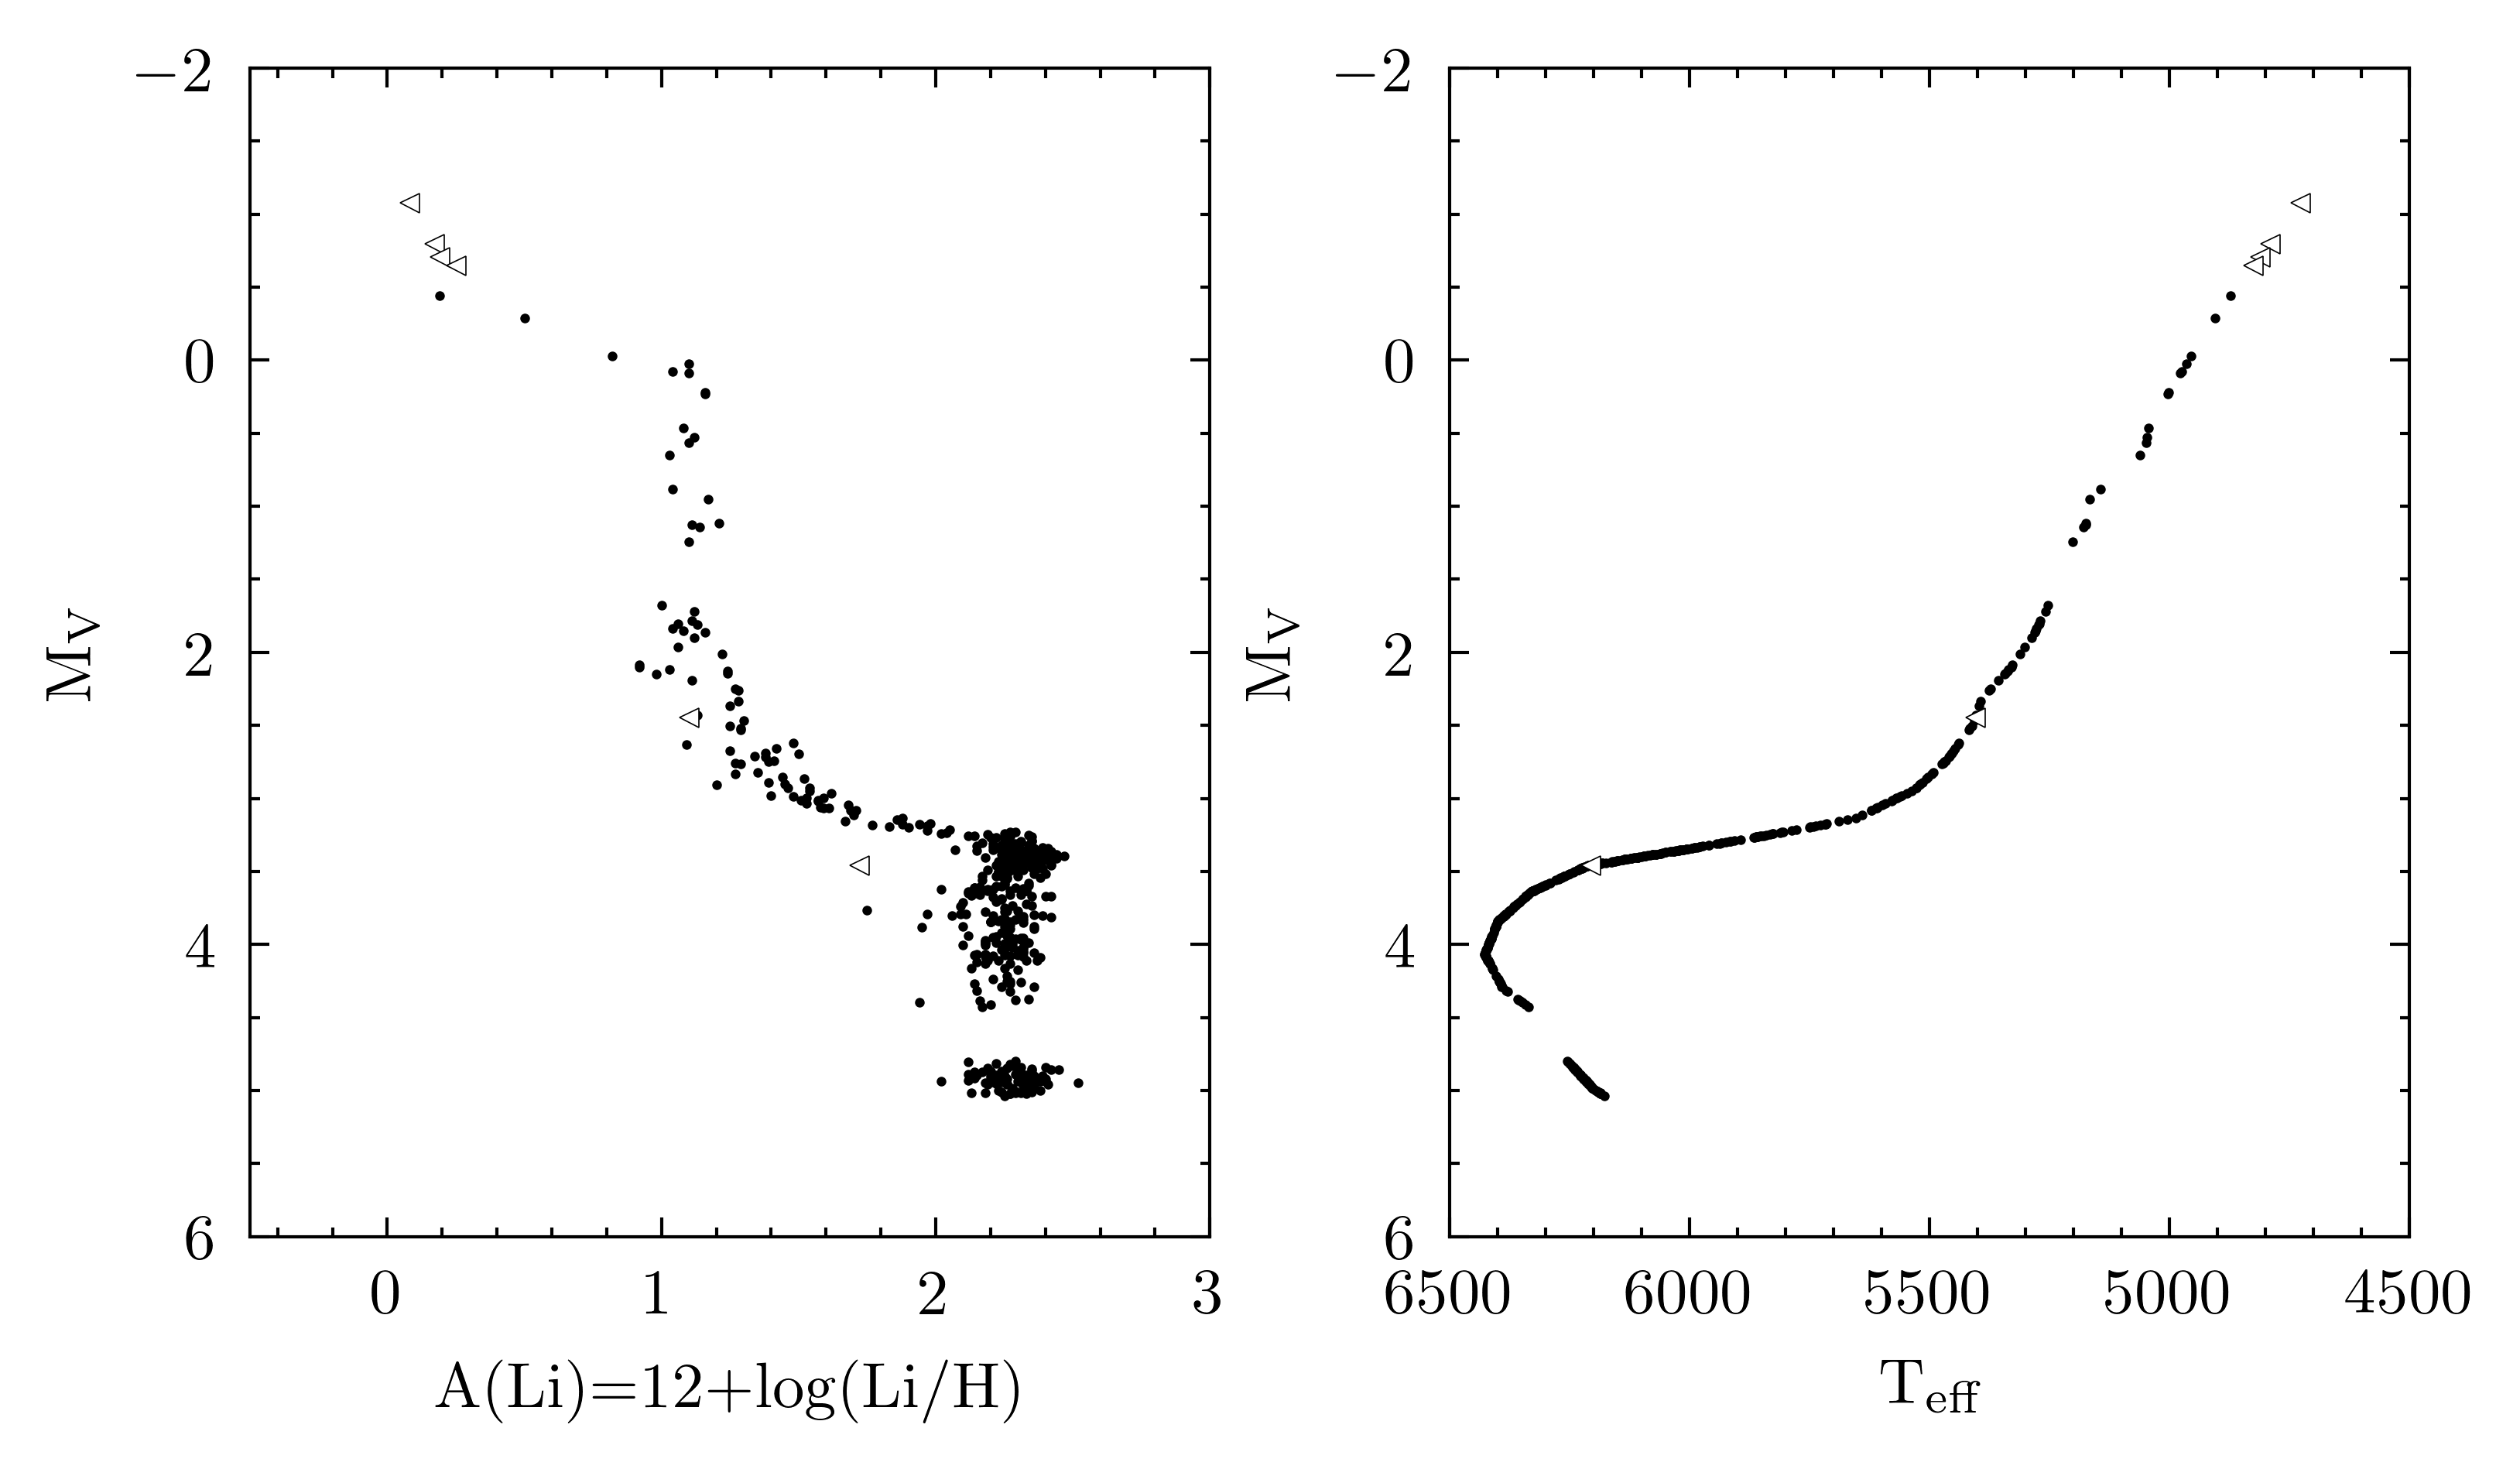

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# Axis Limits

minALi = -0.5
maxALi = 3.0
minTeff = 6500
maxTeff = 4500
minM_V = 6.0
maxM_V = -2.0

# left panel: M_V vs. A(Li)

ax1.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(minALi,maxALi)
ax1.set_ylim(minM_V,maxM_V)
ax1.xaxis.set_major_locator(MultipleLocator(1.0))
ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.yaxis.set_major_locator(MultipleLocator(2.0))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_xlabel(r'A(Li)=12+log(Li/H)', fontsize=axisFontSize)
ax1.set_ylabel(r'M$_{\rm V}$', fontsize=axisFontSize)

ax2.tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(minTeff,maxTeff)
ax2.set_ylim(minM_V,maxM_V)
ax2.xaxis.set_major_locator(MultipleLocator(500))
ax2.xaxis.set_minor_locator(MultipleLocator(100))
ax2.yaxis.set_major_locator(MultipleLocator(2.0))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_xlabel(r'T$_{\rm eff}$', fontsize=axisFontSize)
ax2.set_ylabel(r'M$_{\rm V}$', fontsize=axisFontSize)

for i in range(len(M_V)):
    if limit[i]==1:
        ax1.plot(ALi[i],M_V[i],'<',mfc='white',mec='black',mew=0.2,ms=3,zorder=10)
        ax2.plot(Teff[i],M_V[i],'<',mfc='white',mec='black',mew=0.2,ms=3,zorder=10)
    else:
        ax1.plot(ALi[i],M_V[i],'o',color='black',mew=0.0,ms=1.5,zorder=8)
        ax2.plot(Teff[i],M_V[i],'o',color='black',mew=0.0,ms=1.5,zorder=8)
        
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')